## OpenAI Gym

In [1]:
%pip install -q -U gymnasium
%pip install swig
%pip install -q -U gymnasium[classic_control,box2d,atari,accept-rom-license]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.2 MB/s eta 0:00:00


In [2]:
import gymnasium as gym

env = gym.make("CartPole-v1", render_mode='rgb_array')

In [3]:
obs, info = env.reset(seed=42)
obs

array([ 0.0273956 , -0.00611216,  0.03585979,  0.0197368 ], dtype=float32)

In [4]:
info

{}

In [5]:
img = env.render()
img.shape

(400, 600, 3)

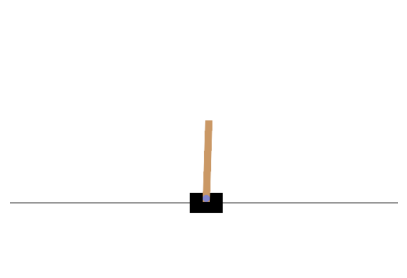

In [7]:
import matplotlib.pyplot as plt

def plot_environment(env, figsize=(5, 4)):
    plt.figure(figsize=figsize)
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    return img

plot_environment(env)
plt.show()

In [8]:
env.action_space

Discrete(2)

In [9]:
action = 1
obs, reward, done, truncated, info = env.step(action)
obs

array([ 0.02727336,  0.18847767,  0.03625453, -0.26141977], dtype=float32)

In [10]:
reward

1.0

In [11]:
done

False

In [12]:
truncated

False

In [13]:
info

{}

In [14]:
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1

totals = []
for episode in range(500):
    episode_rewards = 0
    obs, info = env.reset(seed=episode)
    for step in range(200):
        action = basic_policy(obs)
        obs, reward, done, truncated, info = env.step(action)
        episode_rewards += reward
        if done or truncated:
            break

        totals.append(episode_rewards)

In [17]:
import numpy as np
np.mean(totals), np.std(totals), np.min(totals), np.max(totals)

(21.713696004717676, 13.151677912691767, 1.0, 62.0)

## NN Policy

In [18]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])